<a href="https://colab.research.google.com/github/Mabinogit/AI-Image-Classification/blob/main/Neural_network_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [ ]:
! pip install tensorflow
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Data Set

This is data from mnist Data set
60 000 for trianing -
10 000 fro validation

In [ ]:
fashion = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data() # spliting dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_images.shape
# we have 60 000 images that are 28 pixels by 28 (780 pixels in total)

(60000, 28, 28)

In [ ]:
type(train_images)
# to get value of one pixel
train_images[0,23,23]

194

Our pixels have to value between 0 and 255. 0 being black and 255 being white. this means there are not grey grey scale image as there are no color channels.

In [ ]:
# lets look at first training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integres ranging from 0-9. Each integer represents a single article of clothing. We will creat an array of label names to indicate.

which is which

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Lets use motplotlib to show what one of these imageslook like

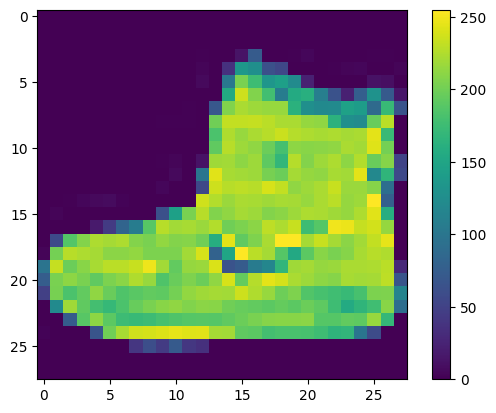

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Data Pre-processing

In this case we need to pre-process the data by tranforming it into 0 and 1 from the range of 0-255. we will do this be dividing each value of 255

We try to keep it between the range of -1 and 1. we are trying to get out number as small as possible before we feed them into the neural network.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Building the model

 use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right).

In [ ]:
model = keras.Sequential([
    # flatten allows us to take a shape like 28 by 28 and flatten all pixels into 728 pixels
    keras.layers.Flatten(input_shape=(28,28)),
    #Dense means all neurons from previous are connected to all current neurons.
    # 128 is a random number and activation is our activation function
    keras.layers.Dense(128, activation='relu'), # Layer 1
    # we chose 10 because an output layer is supposed to have as many neurons classes as we are going to predict for and in this case we have 10 classes or items of clothing
    keras.layers.Dense(10, activation='softmax') # Layer 2

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class

# Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7799 - loss: 0.6325
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8619 - loss: 0.3820
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8779 - loss: 0.3360
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8824 - loss: 0.3178
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8931 - loss: 0.2935
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8940 - loss: 0.2850
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9031 - loss: 0.2639
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9068 - loss: 0.2520
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9080 - loss: 0.2457
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9131 - loss: 0.2341


# Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [ ]:
# verbose let us know if we are looking at output or not. How much is printing to the counsel

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

# A big disparity between training data and test data means that we have overfit our model. this means our models is too used to trained data and is not adaptable to new data

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8861 - loss: 0.3340
Test accuracy: 0.8844000101089478


# Hyperameter Training

Is means change parameters like epochs,optimizer,loss function, output parameter, hidden laer number. So thatwe can achieve a higher accuracy on test data

# Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to .predict() method.

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1

In [ ]:
predictions[0]

If we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array.

In [ ]:
np.argmax(predictions[0])

9

And we can check if this is correct by looking at the value of the cooresponding test label

In [ ]:
test_labels[0]

9

# Verifying Predictions
I've written a small function here to help us verify predictions with some simple visuals. Helps us compare between te actual item in the model and prediction of the model

In [ ]:
#  COLOR = 'white': This sets the color to white for plotting purposes.
COLOR = 'white'

#plt.rcParams['text.color'] = COLOR: This changes the default color of all text in Matplotlib plots to white. plt.rcParams is a way to configure Matplotlib's appearance settings.
plt.rcParams['text.color'] = COLOR

#plt.rcParams['axes.labelcolor'] = COLOR: This changes the color of axis labels to white.
plt.rcParams['axes.labelcolor'] = COLOR

#This setup is likely to be used when you're working on a dark background, so the text and labels are more visible


In [ ]:
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

#show_image(): This function (not shown here) is likely used to display the image along with both the correct label (from class_names[correct_label]) and the predicted class (predicted_class).
# It helps visualize how well the model is doing on the prediction.
  show_image(image, class_names[correct_label], predicted_class)

In [ ]:
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [ ]:
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

Pick a number: 78
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


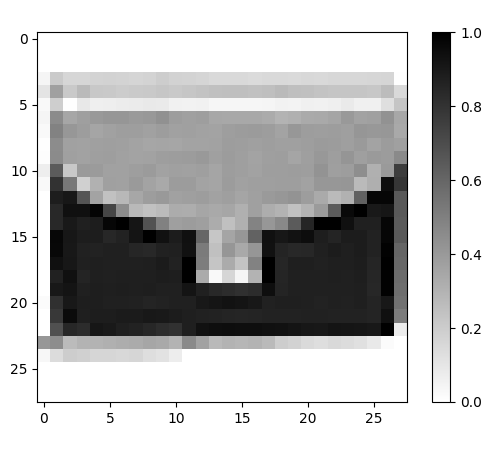

In [ ]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)